## 1. Data Loading and preprocessing

In [1]:
import os
from PIL import Image, ImageDraw, ImageChops, ImageFilter                                                 
import numpy as np                                                                 
import ntpath
import matplotlib.pyplot as plt

def get_imagePathList(path):
    return [os.path.join(path, img) for img in os.listdir(path)]

emotionLabel = {"HA":0, "SA":1, "SU":2, "AN":3, "DI":4, "FE":5, "NE":6}

In preprocessing, I am taking a face crop, adding a elliptical mask and downsampling the image.
face crop is hardcoded but a opencv face detector can be used to get face crops. elliptical mask is to keep face feature relevant for expression identification and eliminate other non relevant details of human head (like hairs and ears).  Data agumentation can be done, but avoided here due to time constraint :D

(64, 69)


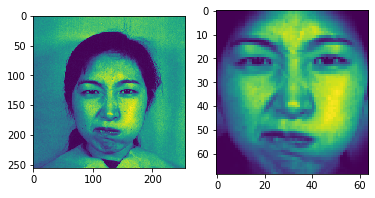

In [2]:
from matplotlib.pyplot import imshow

%matplotlib inline

def data_preprocessing(img=None): 
    width, height = img.size 
  
    # Setting the points for cropped image 
    left = 64
    top = 85
    right = width - 64
    bottom = height - 32
  
    # Cropped image of above dimension 
    im1 = img.crop((left, top, right, bottom))
    
    faceCropMask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(faceCropMask)
    crpWidth, crpHeight = im1.size
    
    # Elliptical mask to retain just the facial features
    draw.ellipse((0, 0, crpWidth, crpHeight), fill=255)
    mask_blur = faceCropMask.filter(ImageFilter.GaussianBlur(7))
    
    im2 = Image.new("L", im1.size, 0)
    im3 = Image.composite(im1, im2, mask_blur)

    # Hardcoding resize
    width, height = im3.size
    im3 = im3.resize((int(width/2), int(height/2)))
    return im3

# Test Preprocessing
img = Image.open(r"C:\Users\doge\Desktop\Expression Data\KA.AN1.39.tiff")
croppedImg = data_preprocessing(img)

print(croppedImg.size)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(np.asarray(img))
f.add_subplot(1,2, 2)
plt.imshow(np.asarray(croppedImg))
plt.show()

Loading Data from given path, applying preprocesng to it, and storing it in numpy array "Data" and "Label"

In [3]:
path = r"C:\Users\doge\Pictures\Expression Data"

In [4]:
Data = np.zeros(shape = (213, 64*69), dtype = np.float)
Label = np.zeros(shape = (213,1), dtype = np.uint8)

indx = 0
for p in (get_imagePathList(path)):
    #print(p)
    img = Image.open(p)
    croppedImg = data_preprocessing(img)
    
    #saveimg = str(indx) + ".jpg"
    #croppedImg.convert('RGB').save(os.path.join(r"C:\Users\doge\Desktop\crop", saveimg))
    np_img = np.array(croppedImg, dtype=np.float)
    Data[indx] = np_img.flatten()
    
    #print (np_img.shape, np_img.dtype)
    
    # sanity check for label extraction
    if ntpath.basename(p)[3:5] not in emotionLabel:
        print("Label not present")
    
    print(ntpath.basename(p)[3:5], emotionLabel[ntpath.basename(p)[3:5]])
    Label[indx] = emotionLabel[ntpath.basename(p)[3:5]]
    indx = indx + 1

AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5
HA 0
HA 0
HA 0
NE 6
NE 6
NE 6
SA 1
SA 1
SA 1
SU 2
SU 2
SU 2
AN 3
AN 3
AN 3
DI 4
DI 4
DI 4
FE 5
FE 5
FE 5


In [5]:
Data[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
# Sanity check
#immg1 = Data[3]
#immg2 = immg1.reshape(96,64).astype(np.uint8)
#immg3 = Image.fromarray(immg2)
#immg3.show()

## 2. Train Test Split


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.06, random_state=42)
print("Training sample: {} ".format(len(X_train)) )
print("Test sample: {} ".format(len(X_test)) )

#train_Data = Data

Training sample: 200 
Test sample: 13 


## 3. Training Model
I am planning to use PCA for first approach, before looking out for other featue extraction techniques. The projected data on lower space havinghigh variance will be used as features for training a classifier.

In [8]:
from numpy import array
from sklearn.decomposition import PCA

# As a hunch deciding to use 10 prominent discriminating direction 
pca = PCA(10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X_train_10D = pca.transform(X_train)

### Inspect the PCA projections
Chekcing the projection on first two dimention, in first attempt not very healthy seperation of projected face expression ! Still going for training the classifier  

Text(0.5, 1.0, 'PCA of emotoin')

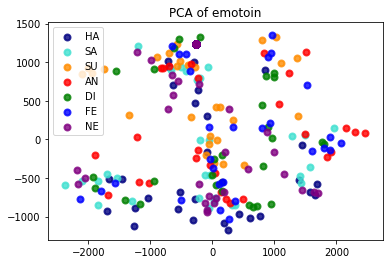

In [10]:

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple']
target_names = ["HA", "SA", "SU", "AN", "DI", "FE", "NE"]
lw = 2

for color, i, target_name in zip(colors, [0,1,2,3,4,5,6], target_names):
    plt.scatter(X_train_10D[np.where(y_train == i), 0], X_train_10D[np.where(y_train == i), 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of emotoin')

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
               {'kernel': ['poly'], 'degree': [3, 6, 9], 'C': [1, 10, 100, 1000]}]

svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_10D, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [3, 6, 9],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
print('Best score for training data:', svm_model.best_score_) 
print('Best C:',svm_model.best_estimator_.C) 
print('Best Kernel:',svm_model.best_estimator_.kernel)
print('Best Degree:',svm_model.best_estimator_.degree)

Best score for training data: 0.775
Best C: 100
Best Kernel: poly
Best Degree: 3


In [13]:
myClassifier = svm_model.best_estimator_

## 4 Model Evaluation

In [14]:
X_test_10D = pca.transform(X_test)

In [15]:
y_prediction = myClassifier.predict(X_test_10D)

In [16]:
print(confusion_matrix(y_test,y_prediction))

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 1 0 1 0 0]
 [0 0 0 0 0 1 2]]


In [17]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       1.00      0.67      0.80         3

    accuracy                           0.62        13
   macro avg       0.55      0.67      0.58        13
weighted avg       0.55      0.62      0.56        13



Quick Comments:
1. Performance on Class 4 and 5 (digust and fear) is bad. Perhaps data agumentation should have done to have more support samplpes.
2. I have used PCA projections as features, other features like HOG can also be tried.
3. nose-eyes-mouth detector can be used to use crops of respective region for feature extraction. These region promimently capture expression. opencv facedetecion give out eyes and mouth detection  